### Description

Implement machine learning models that can recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Solution for this problem

- Preprocess data (drop missing values, normalize data, ...)
- Apply classification algorithms into original imbalanced dataset to evaluate their performance.
- Apply undersampling, oversampling method to solve imbalanced issue.
- Re-apply classifications algorithms into undersampled/oversampled dataset to see if the performance of models is improved.
- Trying apply ensemble methods (Bagging, RandomForest, Boosting, ...) into undersampled/oversampled dataset to evaluate performance.

#### 1. Load data

In [ ]:
# Go to dataset directory
import os

path = '/content/drive/MyDrive/Deep Learning/Data'
os.chdir(path)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Deep Learning/Data/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


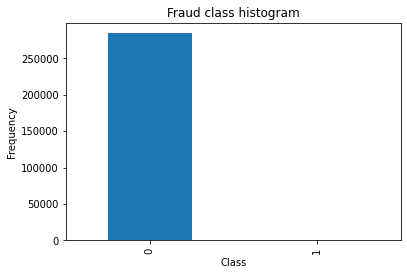

In [ ]:
# CHECKING THE TARGET CLASSES:
import matplotlib.pyplot as plt
import numpy as np

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Normalize the 'Amount' column
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data = df.drop(['Time','Amount'],axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
# Assigning X and Y. No resampling
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [ ]:
X.shape

(284807, 29)

In [ ]:
y.shape

(284807, 1)

#### 2. Apply classification algorithms into original imbalanced dataset

In [ ]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [ ]:
# Import classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report


# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = 100*accuracy_score(y_test, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification report:\n', classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR : 99.9204147794436
Confusion matrix:
 [[85284    12]
 [   56    91]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA : 99.93914071369217
Confusion matrix:
 [[85281    15]
 [   37   110]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.75      0.81       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN : 99.9438221972543
Confusion matrix:
 [[85289     7]
 [   41   106]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

CART : 99.92275552122467
Confusion matrix:
 [[85267    29]
 [   37   110]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.75      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NB : 97.84066570696254
Confusion matrix:
 [[83475  1821]
 [   24   123]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 99.93445923013002
Confusion matrix:
 [[85291     5]
 [   51    96]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.65      0.77       147

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# model = KNeighborsClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc = 100*accuracy_score(y_test, y_pred)
# print('Accuracy = ', acc)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy =  99.9438221972543
[[85289     7]
 [   41   106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### 3. Apply undersampling, oversampling method to solve imbalanced issue.

In [ ]:
# Undersample data
def under_sample(data):
  # Number of data points in the minority class
  number_records_fraud = len(data[data.Class == 1])
  # Picking indices of the fraud classes
  fraud_indices = np.array(data[data.Class == 1].index)
  # Picking the indices of the normal classes
  normal_indices = data[data.Class == 0].index
  # Out of the indices we picked, randomly select "x" number (number_records_fraud)
  random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
  random_normal_indices = np.array(random_normal_indices)
  # Appending the 2 indices
  under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
  # Under sample dataset
  under_sampled_data = data.iloc[under_sample_indices,:]

  return under_sampled_data

In [ ]:
# Oversample data
def over_sample(data):
  # Number of data points in the minority class
  number_records_normal = len(data[data.Class == 0])
  # Picking indices of the normal classes
  normal_indices = np.array(data[data.Class == 0].index)
  # Picking the indices of the fraud classes
  fraud_indices = data[data.Class == 1].index
  # Out of the indices we picked, randomly select "x" number (number_records_fraud)
  random_fraud_indices = np.random.choice(fraud_indices, number_records_normal, replace = True)
  random_fraud_indices = np.array(random_fraud_indices)
  # Appending the 2 indices
  over_sample_indices = np.concatenate([normal_indices,random_fraud_indices])
  # Under sample dataset
  over_sampled_data = data.iloc[over_sample_indices,:]

  return over_sampled_data

In [ ]:
undersampled_data = under_sample(data)
oversampled_data = over_sample(data)

In [ ]:
undersampled_data.shape

(984, 30)

In [ ]:
oversampled_data.shape

(568630, 30)

In [ ]:
X_undersample = undersampled_data.iloc[:, undersampled_data.columns != 'Class']
y_undersample = undersampled_data.iloc[:, undersampled_data.columns == 'Class']

In [ ]:
# Showing ratio
print("Percentage of normal transactions: ", len(undersampled_data[undersampled_data.Class == 0])/len(undersampled_data))
print("Percentage of fraud transactions: ", len(undersampled_data[undersampled_data.Class == 1])/len(undersampled_data))
print("Total number of transactions in resampled data: ", len(undersampled_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [ ]:
# Split undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

In [ ]:
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


#### 4. Re-apply classifications algorithms into undersampled data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train_undersample, y_train_undersample)
    y_pred = model.predict(X_test_undersample)
    result = 100*accuracy_score(y_test_undersample, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    print('Confusion matrix:\n', confusion_matrix(y_test_undersample, y_pred))
    print('Classification report:\n', classification_report(y_test_undersample, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LR : 93.91891891891892
Confusion matrix:
 [[140   9]
 [  9 138]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       149
           1       0.94      0.94      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

LDA : 91.21621621621621
Confusion matrix:
 [[145   4]
 [ 22 125]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       149
           1       0.97      0.85      0.91       147

    accuracy                           0.91       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.92      0.91      0.91       296

KNN : 94.93243243243244
Confusion matrix:
 [[148   1]
 [ 14 133]]
Classification report:
               precision    recall  f1-score   support

           0       0.9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Try using ensemble methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

models = []
models.append(('Bagging', BaggingClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))

# Evaluate each model in turn:
# scoring = 'accuracy'
results=[]
names=[]
for name, model in models:
    model.fit(X_train_undersample, y_train_undersample)
    y_pred = model.predict(X_test_undersample)
    result = 100*accuracy_score(y_test_undersample, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    print('Confusion matrix:\n', confusion_matrix(y_test_undersample, y_pred))
    print('Classification report:\n', classification_report(y_test_undersample, y_pred))
  

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bagging : 92.56756756756756
Confusion matrix:
 [[143   6]
 [ 16 131]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       149
           1       0.96      0.89      0.92       147

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

RandomForest : 94.93243243243244
Confusion matrix:
 [[145   4]
 [ 11 136]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       149
           1       0.97      0.93      0.95       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

ExtraTrees : 94.93243243243244
Confusion matrix:
 [[147   2]
 [ 13 134]]
Classification report:
               precision    recall  f1-score   support

 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting : 93.91891891891892
Confusion matrix:
 [[142   7]
 [ 11 136]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       149
           1       0.95      0.93      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost : 91.8918918918919
Confusion matrix:
 [[140   9]
 [ 15 132]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       149
           1       0.94      0.90      0.92       147

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



#### 5. Re-apply classifications algorithms into oversampled data

In [ ]:
X_oversample = oversampled_data.iloc[:, oversampled_data.columns != 'Class']
y_oversample = oversampled_data.iloc[:, oversampled_data.columns == 'Class']

In [ ]:
# Showing ratio
print("Percentage of normal transactions: ", len(oversampled_data[oversampled_data.Class == 0])/len(oversampled_data))
print("Percentage of fraud transactions: ", len(oversampled_data[oversampled_data.Class == 1])/len(oversampled_data))
print("Total number of transactions in resampled data: ", len(oversampled_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  568630


In [ ]:
# Split oversampled dataset
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversample
                                                                                                   ,y_oversample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

In [ ]:
print("Number transactions train dataset: ", len(X_train_oversample))
print("Number transactions test dataset: ", len(X_test_oversample))
print("Total number of transactions: ", len(X_train_oversample)+len(X_test_oversample))

Number transactions train dataset:  398041
Number transactions test dataset:  170589
Total number of transactions:  568630


In [ ]:
print(len(y_train_oversample))
print(len(y_test_oversample))

398041
170589


In [ ]:
# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train_oversample, y_train_oversample)
    y_pred = model.predict(X_test_oversample)
    result = 100*accuracy_score(y_test_oversample, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    print('Confusion matrix:\n', confusion_matrix(y_test_oversample, y_pred))
    print('Classification report:\n', classification_report(y_test_oversample, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR : 94.86367819730464
Confusion matrix:
 [[83188  1970]
 [ 6792 78639]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     85158
           1       0.98      0.92      0.95     85431

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA : 91.67414077109309
Confusion matrix:
 [[84063  1095]
 [13108 72323]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92     85158
           1       0.99      0.85      0.91     85431

    accuracy                           0.92    170589
   macro avg       0.93      0.92      0.92    170589
weighted avg       0.93      0.92      0.92    170589



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN : 99.95603467984454
Confusion matrix:
 [[85083    75]
 [    0 85431]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85158
           1       1.00      1.00      1.00     85431

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

CART : 99.96834496948807
Confusion matrix:
 [[85104    54]
 [    0 85431]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85158
           1       1.00      1.00      1.00     85431

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NB : 91.62841683813141
Confusion matrix:
 [[82921  2237]
 [12044 73387]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     85158
           1       0.97      0.86      0.91     85431

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 97.19794359542526
Confusion matrix:
 [[84179   979]
 [ 3801 81630]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     85158
           1       0.99      0.96      0.97     85431

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score

def Confusion_Matrix(y_test,y_pred):
    cfmat = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: \n',classification_report(y_test,y_pred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, y_pred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,y_pred)))

#### 6. SMOTE

In [ ]:
# SMOTE method
from imblearn.over_sampling import SMOTE

sm = SMOTE()

# data = pd.get_dummies(dataset,drop_first=True)

# X = dataset_dummy.drop(["Exited"],axis=1)
# y = dataset_dummy['Exited']

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
X_sm.shape, y_sm.shape

((568630, 29), (568630, 1))

In [ ]:
# Showing ratio
print("Percentage of normal transactions: ", len(oversampled_data[oversampled_data.Class == 0])/len(oversampled_data))
print("Percentage of fraud transactions: ", len(oversampled_data[oversampled_data.Class == 1])/len(oversampled_data))
print("Total number of transactions in resampled data: ", len(oversampled_data))

In [ ]:
print(len(y_sm[y_sm.Class == 0])/len(y_sm))
print(len(y_sm[y_sm.Class == 1])/len(y_sm))

0.5
0.5


In [ ]:
# Split smote data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm,test_size = 0.3,random_state = 0)

In [ ]:
print(X_train_sm.shape)
print(X_test_sm.shape)

(398041, 29)
(170589, 29)


In [ ]:
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)
y_sm_pred = model.predict(X_test_sm)

acc = 100*accuracy_score(y_test_sm, y_pred)
print('Accuracy Score:', acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 97.05022011970291


In [ ]:
cfmat = confusion_matrix(y_test_sm, y_sm_pred)
print('Confusion matrix:\n', cfmat)

Confusion_Matrix(y_test_sm,y_sm_pred)

Confusion matrix:
 [[83000  2172]
 [ 7038 78379]]
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85172
           1       0.97      0.92      0.94     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



TN - True Negative 78379
FP - False Positive 7038
FN - False Negative 2172
TP - True Positive 83000
Accuracy Rate: 0.9460105868490934
Misclassification Rate: 0.053989413150906565
F1-Score: 0.9459709410392397
ROC-AUC 0.9460514427577374
